# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

## 01 - Problem (case study)

- Data Description.

- Goal.

In [140]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [141]:
# data is marketing customer anaylsis
# goal - to analyse the relationship between the target variable 'total claim amount' and the rest of the veriables.

## 02 - Getting Data

Read the .csv file.

In [142]:
data = pd.read_csv("marketing_customer_analysis.csv")

In [143]:
# check for duplicate rows first
data.duplicated().value_counts()

False    9134
dtype: int64

## 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [144]:
# check for null values - in this case there are none to remove/replace
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [145]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [146]:
# standardise column names
data.columns = [column.lower().replace(' ', '_') for column in data.columns]

In [147]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [148]:
# make copy before splitting into object and categorical and messing around with cleaning data
data1 = data.copy()

In [149]:
cat = data1.select_dtypes('object')
cat

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [150]:
# check categorical columns to see if there is anything to clean
for column in cat.columns:
    print(column, cat[column].unique())

customer ['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
effective_to_date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rur

In [151]:
# deciding on categorical columns to drop/clean
# customer seems like useless info and there are 9k unique values so better to drop the column before encoding
# policy is similar to policy_type so I will drop this one too
# renew_offer_type also seems useless so I will drop it
# vehicle_size is unneccessary because we have vehicle_class already
# effective_to_date also seems to be irrelevant for our analysis
data1 = data1.drop(columns=['customer', 'policy', 'renew_offer_type', 'vehicle_size', 'effective_to_date'])

In [152]:
# reduced cat data by 5 columns
cat = data1.select_dtypes('object')
cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,sales_channel,vehicle_class
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Agent,Two-Door Car
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Agent,Four-Door Car
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Agent,Two-Door Car
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Call Center,SUV
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Agent,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Web,Four-Door Car
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Branch,Four-Door Car
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Branch,Four-Door Car
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Branch,Four-Door Car


In [153]:
# next step taking a quick look at the numerical data
num = data1.select_dtypes(include=['float64','int64'])
num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [154]:
# round numerical columns to 2 decimal places
data1 = data1.round(decimals=2)
data1

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,sales_channel,total_claim_amount,vehicle_class
0,Washington,2763.52,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Agent,384.81,Two-Door Car
1,Arizona,6979.54,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Agent,1131.46,Four-Door Car
2,Nevada,12887.43,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Agent,566.47,Two-Door Car
3,California,7645.86,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Call Center,529.88,SUV
4,Washington,2813.69,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Agent,138.13,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.99,No,Basic,Bachelor,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Web,198.23,Four-Door Car
9130,California,3096.51,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Branch,379.20,Four-Door Car
9131,California,8163.89,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Branch,790.78,Four-Door Car
9132,California,7524.44,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Branch,691.20,Four-Door Car


In [155]:
# change back to data after the cleaning instead of data 1 to not lose track of which df I'm working with
data = data1.dropna()
data

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,sales_channel,total_claim_amount,vehicle_class
0,Washington,2763.52,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Agent,384.81,Two-Door Car
1,Arizona,6979.54,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Agent,1131.46,Four-Door Car
2,Nevada,12887.43,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Agent,566.47,Two-Door Car
3,California,7645.86,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Call Center,529.88,SUV
4,Washington,2813.69,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Agent,138.13,Four-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.99,No,Basic,Bachelor,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Web,198.23,Four-Door Car
9130,California,3096.51,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Branch,379.20,Four-Door Car
9131,California,8163.89,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Branch,790.78,Four-Door Car
9132,California,7524.44,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Branch,691.20,Four-Door Car


In [156]:
# EDA
summary = data.describe().T 
summary['iqr'] = summary['75%']-summary['25%'] 
summary = summary.apply(lambda x: round(x, 2))
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38,4967.92
income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00,62320.00
monthly_premium_auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00,41.00
months_since_last_claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00,17.00
months_since_policy_inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00,47.00
number_of_open_complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00,0.00
number_of_policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00,3.00
total_claim_amount,9134.0,434.09,290.50,0.10,272.26,383.94,547.52,2893.24,275.26


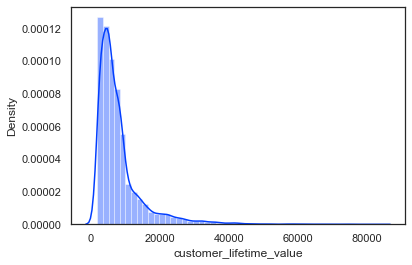

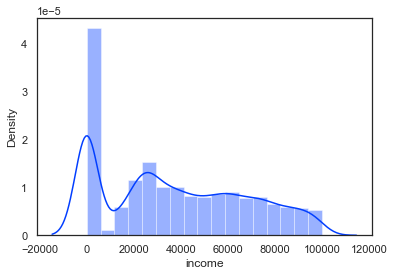

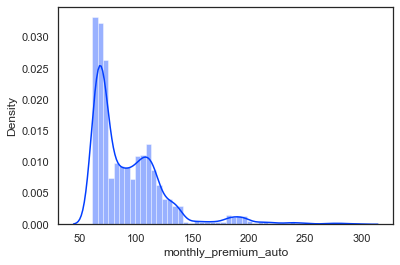

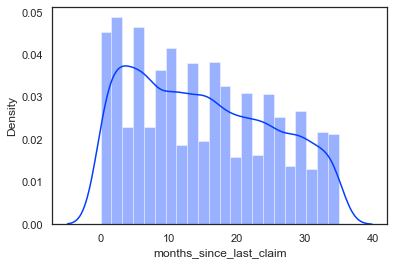

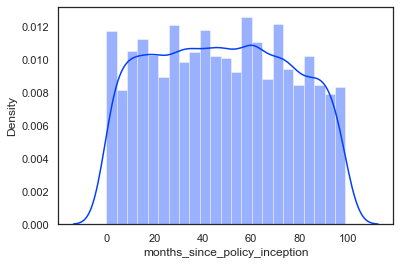

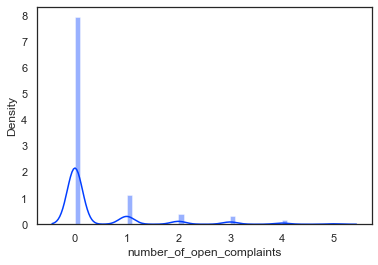

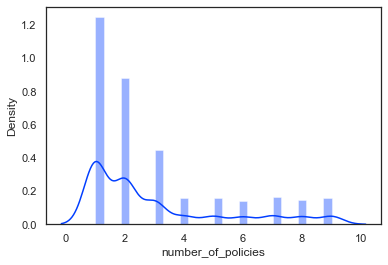

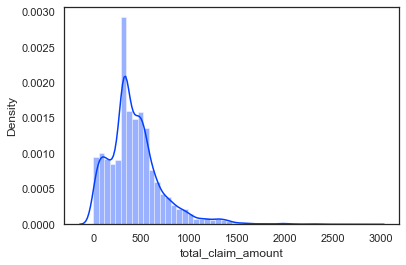

In [157]:
# Distribution plots of all numerical columns to check the distr
for column in data.select_dtypes(np.number).columns:
    sns.distplot(data[column])
    plt.show()

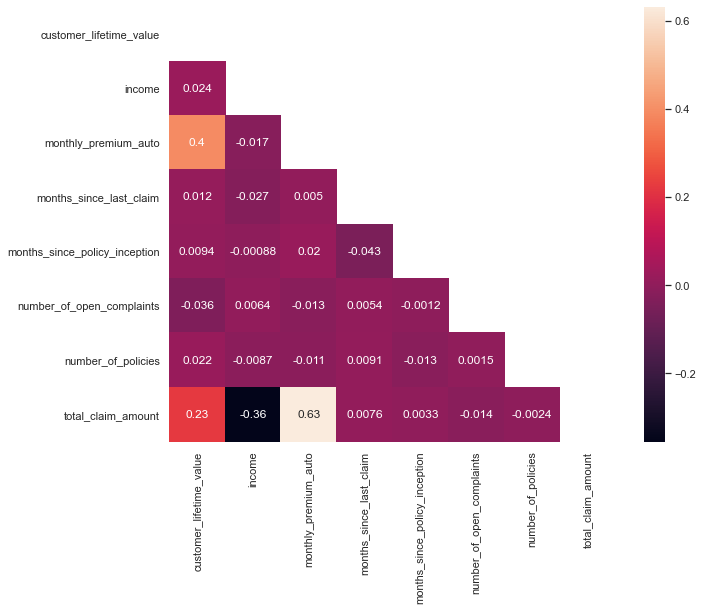

In [158]:
# check collinearity 
mask = np.zeros_like(data.corr())

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

# we can see from this there is no multicollinearity - so no variables to remove

In [ ]:
# check covariance
sns.pairplot(data)

## 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

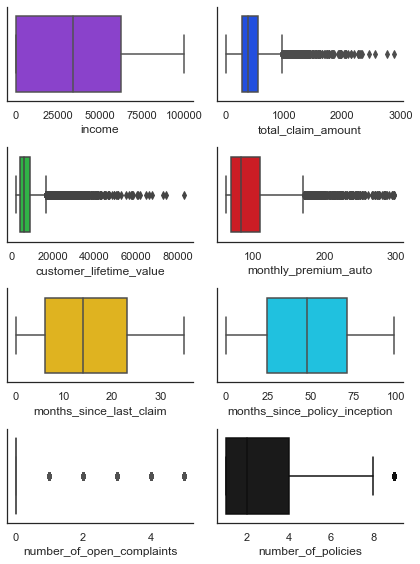

In [159]:
# boxplots to check for outliers

sns.set(style="white", palette="bright", color_codes=True)

f, axes = plt.subplots(4, 2, figsize=(6, 8), sharex=False)
sns.despine(left=False)


sns.boxplot(data['income'], color="m", ax=axes[0, 0])

sns.boxplot(data["total_claim_amount"], color="b", ax=axes[0, 1])

sns.boxplot(data["customer_lifetime_value"], color="g", ax=axes[1, 0])

sns.boxplot(data["monthly_premium_auto"], color="r", ax=axes[1, 1])

sns.boxplot(data["months_since_last_claim"], color="y", ax=axes[2,0])

sns.boxplot(data["months_since_policy_inception"],  color="c", ax=axes[2,1])

sns.boxplot(data["number_of_open_complaints"], color="m", ax=axes[3,0])

sns.boxplot(data["number_of_policies"], color="k", ax=axes[3,1])

plt.tight_layout()

# how can i make this into a for loop?

In [160]:
# remove outliers using function from class
def remove_outliers(data, threshold=1.5, in_columns=data.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(data[column],75)
            lower = np.percentile(data[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            data = data[(data[column]>lower_limit) & (data[column]<upper_limit)]
    return data

In [161]:
# remove outliers but skipped number_of_open_complaints & number_of_policies because these 2 don't seem imp to analysis, but
# don't want to remove all the rows
data1 = data.copy()

data1 = remove_outliers(data1, threshold=1.5, skip_columns=['number_of_open_complaints', 'number_of_polices'])

In [162]:
data1



,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,sales_channel,total_claim_amount,vehicle_class
0,Washington,2763.52,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Agent,384.81,Two-Door Car
2,Nevada,12887.43,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Agent,566.47,Two-Door Car
3,California,7645.86,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Call Center,529.88,SUV
4,Washington,2813.69,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Agent,138.13,Four-Door Car
5,Oregon,8256.30,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Web,159.38,Two-Door Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.40,No,Premium,College,Employed,F,47761,Suburban,Single,104,16,58,0,1,Personal Auto,Branch,541.28,Four-Door Car
9130,California,3096.51,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Branch,379.20,Four-Door Car
9131,California,8163.89,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Branch,790.78,Four-Door Car
9132,California,7524.44,No,Extended,College,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Branch,691.20,Four-Door Car


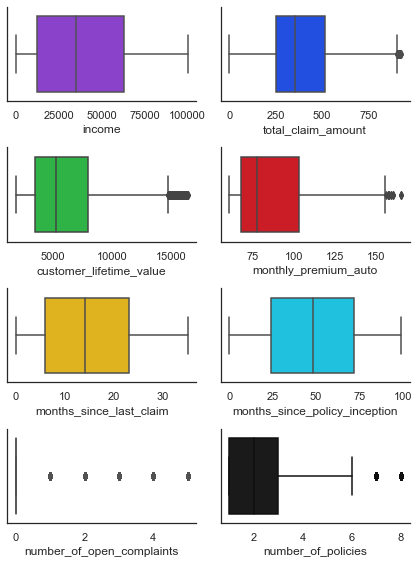

In [164]:
# check for outliers in new df after removing outliers
# data looks better
sns.set(style="white", palette="bright", color_codes=True)

f, axes = plt.subplots(4, 2, figsize=(6, 8), sharex=False)
sns.despine(left=False)


sns.boxplot(data1['income'], color="m", ax=axes[0, 0])

sns.boxplot(data1["total_claim_amount"], color="b", ax=axes[0, 1])

sns.boxplot(data1["customer_lifetime_value"], color="g", ax=axes[1, 0])

sns.boxplot(data1["monthly_premium_auto"], color="r", ax=axes[1, 1])

sns.boxplot(data1["months_since_last_claim"], color="y", ax=axes[2,0])

sns.boxplot(data1["months_since_policy_inception"],  color="c", ax=axes[2,1])

sns.boxplot(data1["number_of_open_complaints"], color="m", ax=axes[3,0])

sns.boxplot(data1["number_of_policies"], color="k", ax=axes[3,1])

plt.tight_layout()

In [170]:
# income column is full of 0s - so I replaced them with the mean income
income_mean = data1['income'].mean()



In [172]:
data1['income'] = data1['income'].replace([0],income_mean)
data1['income'].describe()

count     7400.000000
mean     47853.617122
std      21932.278661
min      10037.000000
25%      33966.000000
50%      38633.729730
75%      63131.000000
max      99981.000000
Name: income, dtype: float64

In [176]:
from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [173]:
# x/y split
y = data1['total_claim_amount']
X = data1.drop(['total_claim_amount'], axis=1)

In [174]:
# split into categorical data / numerical data for encoding & normalisation
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [177]:
# normalise numerical data
transformer = Normalizer().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)

(7400, 7)


In [178]:
# encode categoricals
cat_data = pd.get_dummies(X_cat, drop_first=True)

In [179]:
# concat numerical & categorical back together
X = np.concatenate([x_normalized, cat_data], axis=1)

In [180]:
# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 05 - Modeling

Apply model.

In [181]:
# apply model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [182]:
predictions  = model.predict(X_test)
predictions.shape
# are the rows 2200 because it's only a sample from the main df?

(2220,)

## 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [184]:
r2_score(y_test, predictions)

0.7672839100211766

In [185]:
mse = mean_squared_error(y_test, predictions)
print(mse)

9260.484162376079


In [186]:
import math

rmse = math.sqrt(mse)
print(rmse)

96.23140943775103


In [187]:
mean_absolute_error(y_test, predictions)

74.48564018064555

## 07 - Reporting

Present results.

In [192]:
results = pd.DataFrame()

results['true'] = y_test
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

# is this correct?

,true,pred,resid
5821,460.80,503.801583,43.001583
6270,55.51,79.564481,24.054481
9036,351.27,361.898539,10.628539
204,669.68,480.568266,189.111734
2416,547.20,616.652276,69.452276
...,...,...,...
3494,309.58,218.752762,90.827238
329,639.11,516.126815,122.983185
2530,191.10,161.500581,29.599419
4710,292.80,400.148014,107.348014


In [191]:
results.describe()

,true,pred,resid
count,2220.000000,2220.000000,2220.000000
mean,370.995225,377.441258,74.485640
std,199.526910,178.641418,60.942978
min,0.890000,-20.440226,0.032759
25%,237.982500,244.478319,30.235274
50%,350.400000,403.415176,62.539329
75%,504.000000,497.139447,100.382674
max,921.600000,842.915103,458.662745


In [ ]:
# how can I interpret these results? what does this tell us about all of the independant variables?
# they seem ok so can we say the model is good?